# The Good, The Bad, and The Ugly (spatial map of EZ/PZ/HZ)

While all the models are wrong, but good to know the useful one!


The influence of prior on WAIC and PSIS-LOO to infer the correct epileptogenicity hypothesis

In [1]:
import os
import sys
import errno
import time

import os
import sys
import time

import numpy as np

import matplotlib.pyplot as plt
import pystan

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from IPython.display import HTML

In [3]:
%pylab inline
#%matplotlib notebook
plt.style.use('seaborn-poster');

Populating the interactive namespace from numpy and matplotlib


In [4]:
plt.style.use('default')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

# Generate Data

In [5]:
random.seed(11442)

In [6]:
Nt, Tend, sigma = 5000,50.0, 1e-1

In [7]:
dt=Tend/Nt
print ('dt:', dt)

dt: 0.01


In [8]:
tau0=10.0
I1=3.1

In [10]:
eta_true=-1.5
params_true=[eta_true]

In [11]:
xs, zs = [-1.5], [3.5]

for i in range(Nt-1):
    x, z = xs[-1], zs[-1]
    dx =1.0 - x**3 - 2.0*x**2 - z + I1   
    dz =(1.0/tau0)*(4*(x-eta_true) - z)
    xs.append(x + dt * dx + sqrt(dt) * sigma * randn())
    zs.append(z + dt * dz + sqrt(dt) * sigma * randn())
    
xs,zs = array(xs), array(zs)

xs,zs = array(xs)+sigma*randn(xs.size), array(zs)+sigma*randn(zs.size)

obs= array([xs, zs]).transpose()  

In [12]:
ts = dt*r_[:xs.shape[0]]

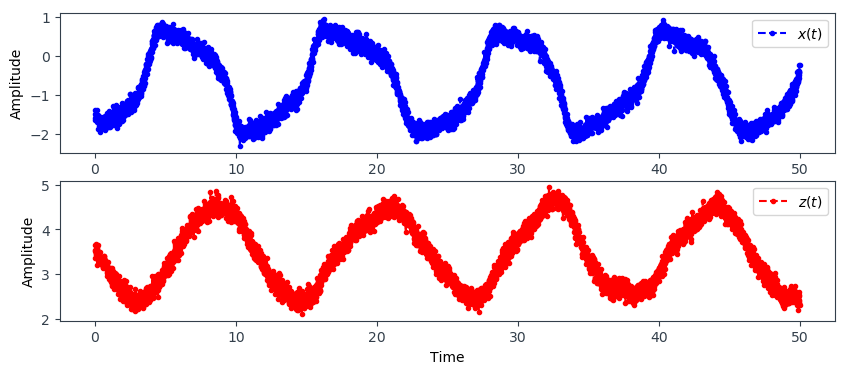

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.plot(ts, obs[:,0], '--b.', label='$x(t)$')
plt.xlabel('Time'); plt.ylabel('Amplitude'); 
plt.legend(loc='upper right')
plt.subplot(212)
plt.plot(ts, obs[:,1], '--r.', label='$z(t)$')
plt.xlabel('Time'); plt.ylabel('Amplitude'); 
plt.legend(loc='upper right')
plt.show()

In [16]:
f_decim=10

obs_decim, ts_decim= obs[::f_decim], ts[::f_decim]

In [17]:
obs_decim.shape, ts_decim.shape

((500, 2), (500,))

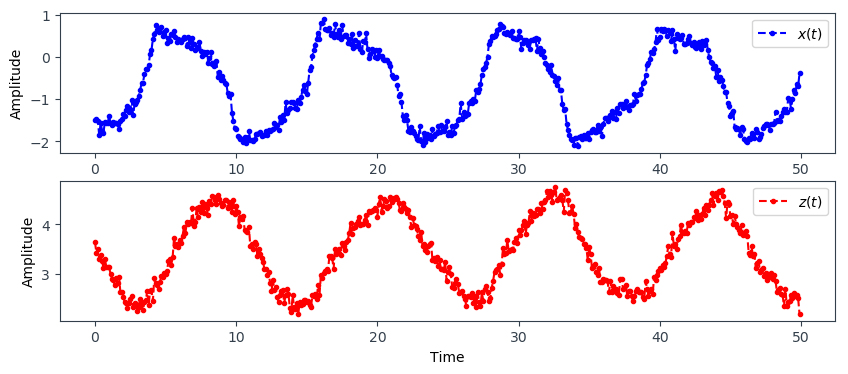

In [18]:
plt.figure(figsize=(10, 4))
plt.subplot(211)
plot(ts_decim, obs_decim[:,0], '--b.', label='$x(t)$')
plt.xlabel('Time'); plt.ylabel('Amplitude'); 
plt.legend(loc='upper right')
plt.subplot(212)
plot(ts_decim, obs_decim[:,1], '--r.', label='$z(t)$')
plt.xlabel('Time'); plt.ylabel('Amplitude'); 
plt.legend(loc='upper right')
plt.show()

In [19]:
nt=obs_decim[:,0].shape[0]
dt_decim=ts_decim[1]-ts_decim[0]
dt_decim

0.1

In [20]:
nt, ts_decim.shape

(500, (500,))

# Generate SweepData 2D  (mu,sd) to run Stan 

In [21]:
cwd = os.getcwd()
cwd

'/data/meysam/VepSyntheticData/BVEP_ModelComp/OneEpileptor/EpileptorInferEZHypos'

In [22]:
sd_value=0.0
mu_value=0.0

In [23]:
data_dict= {
    'nt': nt, 'dt': dt_decim, 
    'xs': obs_decim[:,0], 'zs': obs_decim[:,1], 
    'tau0': tau0,  'I1': I1, 'eta_true':eta_true,
    'xlim': r_[-3.0, 2.0],'zlim': r_[0.0, 10.0],
    'eta_mu': mu_value, 'eta_sd': sd_value,
}

nd=[]
npz = {'nd': nd}
npz.update(data_dict)

savez('data_input2D.npz', **npz)
savez('data_input2D.R.npz', **npz)
pystan.stan_rdump(data_dict, 'data_input2D.R')

In [24]:
filename = "data_input2D"

if filename in os.listdir(cwd):
    print('Directory Exists')

if not os.path.exists(os.path.join(cwd, filename)):
    try:
        os.mkdir(os.path.join(cwd, filename))
    except OSError as exception: 
        if exception.errno != errno.EEXIST:
            raise

Directory Exists


In [25]:
cwd_datainput= os.path.join(cwd, filename)

In [26]:
npz.update(data_dict)

In [27]:
sd_values=array([0.01,  0.025, 0.05, 0.1, 0.5, 1.0, 2.0, 10., 100., 1000.])
mu_values=array([-6.0, -5.5, -5.0, -4.5, -4.0, -3.5,-3.0, -2.5, -2.0,  -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0,  2.5 , 3.0])

In [28]:
idx_R=0
for i in range(1,len(mu_values)+1):
     for j in range(1,len(sd_values)+1):
                npz.update({"eta_mu": mu_values[i-1]})
                npz.update({"eta_sd": sd_values[j-1]})
                print ('eta_mu=', mu_values[i-1])
                print ('eta_sd=', sd_values[j-1])
                idx_R= idx_R+1
                print  ('idx=', (idx_R))
                "data_input2D" + str(idx_R) + ".R.npz"
                "data_input2D%s.R.npz" % idx_R
                file_name_npz="data_input2D{}.npz".format(idx_R)
                savez(os.path.join(cwd_datainput, file_name_npz), **npz)
                
                file_name_Rnpz="data_input2D{}.R.npz".format(idx_R)
                savez(os.path.join(cwd_datainput, file_name_Rnpz), **npz)
                
                file_name_R="data_input2D{}.R".format(idx_R)
                os.chdir(cwd_datainput)
                pystan.stan_rdump( npz, file_name_R)

eta_mu= -6.0
eta_sd= 0.01
idx= 1
eta_mu= -6.0
eta_sd= 0.025
idx= 2
eta_mu= -6.0
eta_sd= 0.05
idx= 3
eta_mu= -6.0
eta_sd= 0.1
idx= 4
eta_mu= -6.0
eta_sd= 0.5
idx= 5
eta_mu= -6.0
eta_sd= 1.0
idx= 6
eta_mu= -6.0
eta_sd= 2.0
idx= 7
eta_mu= -6.0
eta_sd= 10.0
idx= 8
eta_mu= -6.0
eta_sd= 100.0
idx= 9
eta_mu= -6.0
eta_sd= 1000.0
idx= 10
eta_mu= -5.5
eta_sd= 0.01
idx= 11
eta_mu= -5.5
eta_sd= 0.025
idx= 12
eta_mu= -5.5
eta_sd= 0.05
idx= 13
eta_mu= -5.5
eta_sd= 0.1
idx= 14
eta_mu= -5.5
eta_sd= 0.5
idx= 15
eta_mu= -5.5
eta_sd= 1.0
idx= 16
eta_mu= -5.5
eta_sd= 2.0
idx= 17
eta_mu= -5.5
eta_sd= 10.0
idx= 18
eta_mu= -5.5
eta_sd= 100.0
idx= 19
eta_mu= -5.5
eta_sd= 1000.0
idx= 20
eta_mu= -5.0
eta_sd= 0.01
idx= 21
eta_mu= -5.0
eta_sd= 0.025
idx= 22
eta_mu= -5.0
eta_sd= 0.05
idx= 23
eta_mu= -5.0
eta_sd= 0.1
idx= 24
eta_mu= -5.0
eta_sd= 0.5
idx= 25
eta_mu= -5.0
eta_sd= 1.0
idx= 26
eta_mu= -5.0
eta_sd= 2.0
idx= 27
eta_mu= -5.0
eta_sd= 10.0
idx= 28
eta_mu= -5.0
eta_sd= 100.0
idx= 29
eta_mu= -5.0
eta_sd= 1000

In [29]:
%cd ..

/data/meysam/VepSyntheticData/BVEP_ModelComp/OneEpileptor/EpileptorInferEZHypos


# Run Cross-Validation Epiletor2D

In [32]:
cat Epileptor2D_Hypos.stan

data {
    int nt;
    real dt;
    vector[nt] xs;
    real xlim[2];
    real zlim[2];
    real I1;
    real tau0;
    real eta_sd; 
    real eta_mu;
}

transformed data {
}

parameters {
    vector<lower=xlim[1], upper=xlim[2]>[nt] x;
    vector<lower=zlim[1], upper=zlim[2]>[nt] z;
    real eta;  
    real <lower=0.0> amp;
    real offset; 
    real<lower=0.0> eps;   
    real<lower=0.0> sig;
}

model {
    vector[nt] xhat;

    x[1] ~ normal(-1.5, 1.);
    z[1] ~ normal(3.5, 1.);
                         
    eta ~ normal(eta_mu, eta_sd); 
    amp ~ normal(1,2);
    offset ~ normal(0, 2);
    eps ~ normal(0., 1.); 
    sig ~ normal(0., 1.);


    for (t in 1:(nt-1)) {
            real dx = 1.0 - x[t]*x[t]*x[t] - 2.0*x[t]*x[t] - z[t] + I1;
            real dz = (1.0/tau0)*(4*(x[t] - eta) - z[t] );
            x[t+1] ~ normal(x[t] + dt*dx, sqrt(dt)*sig); 
            z[t+1] ~ normal(z[t] + dt*dz, sqrt(dt)*sig);    
    }  

    xhat=amp*x+offset;

    //xs ~ normal(xhat, eps); 

    ta

In [30]:
%%bash

./RunCVHypos.sh

Process is interrupted.


**calculate CV**

In [33]:
%%bash

model=Epileptor2D_Hypos
alg=hmc

python ComputeWAIC_Hypos.py   data_input2D    ${model}  data_output_CV_${alg}_${model}

python ComputePSIS_Hypos.py data_input2D  ${model}  data_output_CV_${alg}_${model}

Process is terminated.


**Plot CV**

In [41]:
import re
import glob
from operator import itemgetter

cwd = os.getcwd()
os.chdir(cwd)

numbers = re.compile(r'(\d+)')

def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [43]:
allNpzFiles = sorted(glob.glob(cwd + "/*.npz"), key=numericalSort)

allNpzFiles

['/data/meysam/VepSyntheticData/BVEP_ModelComp/OneEpileptor/EpileptorInferEZHypos/Outfile_PSIS_CV_data_input2D_Epileptor2D_Hypos.npz',
 '/data/meysam/VepSyntheticData/BVEP_ModelComp/OneEpileptor/EpileptorInferEZHypos/Outfile_WAIC_CV_data_input2D_Epileptor2D_Hypos.npz']

## Plot the WAIC/PSIS-LOO

In [44]:
sd_values=array([0.01,  0.025, 0.05, 0.1, 0.5, 1.0, 2.0, 10, 100, 1000])
mu_values=array([-6.0, -5.5, -5.0, -4.5, -4.0,  -3.5,-3.0, -2.5, -2.0,  -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0,  2.5 , 3.0])


In [45]:
Outputfiles= [x.rsplit('/')[-1].rsplit('.npz')[-2] for x in allNpzFiles if  'Epileptor2D' and "CV" in x]
Outputfiles

['Outfile_PSIS_CV_data_input2D_Epileptor2D_Hypos',
 'Outfile_WAIC_CV_data_input2D_Epileptor2D_Hypos']

In [46]:
Nchain=4

In [47]:
Outfile_WAIC=[]
Outfile_PSIS=[]

elpd_waic_values=[]
p_waic_values=[]
loo_values=[]

for file in Outputfiles:
    
    if "WAIC" in file:
            Outfile_WAIC.append(file)
            npz=load(str(file)+'.npz')
            elpd_waic=npz['elpd_waic_values']
            p_waic=npz['p_waic_values']
            elpd_waic_values.append(elpd_waic)
            p_waic_values.append(p_waic)

    if "PSIS" in file:
            Outfile_PSIS.append(file)
            npz=load(str(file)+'.npz')
            loo=npz['loo_values']
            loo_values.append(loo)
   

In [48]:
waic_values = [i * -2 for i in elpd_waic_values]

In [50]:
elpd_waic_values=asarray(elpd_waic_values)
p_waic_values=asarray(p_waic_values)
loo_values=asarray(loo_values)

In [51]:
p_waic_values_mean=mean(p_waic_values.reshape(-1, Nchain), axis=1)
elpd_waic_values_mean=mean(elpd_waic_values.reshape(-1, Nchain), axis=1)
loo_values_mean=mean(loo_values.reshape(-1, Nchain), axis=1)

/home/meysam/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


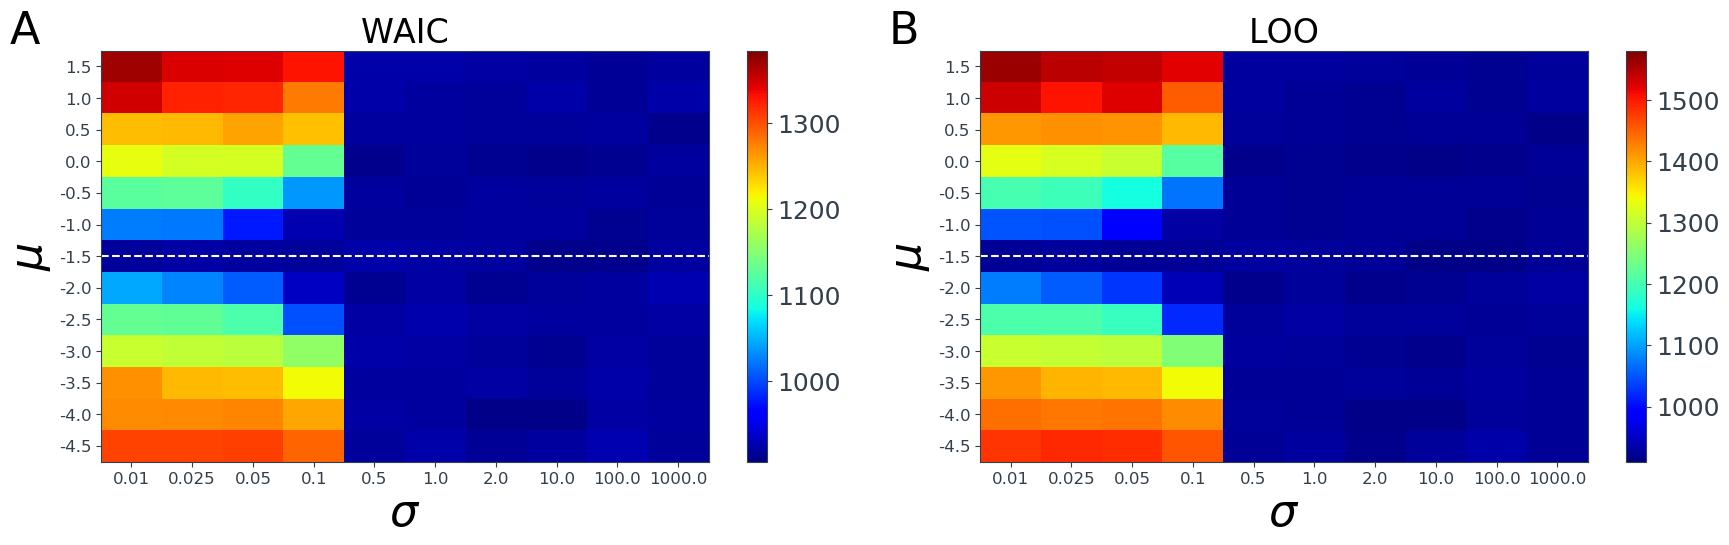

In [41]:
fig=figure(figsize=(18,6))


subplot(121)
imshow((-2*elpd_waic_values_mean).reshape(len(mu_values),len(sd_values)), aspect='auto',  origin='lower', cmap='jet')
plt.hlines(y=9., xmin=-.5, xmax=9.5, linewidth=1.5, color = 'w', linestyle='--' )
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
yticks(r_[:len(mu_values)], mu_values,  fontsize=12);
xticks(r_[:len(sd_values)], sd_values,  fontsize=12);
ylim((2.5,15.5))
xlabel("$\sigma$",  fontsize=32)
ylabel("$\mu$",  fontsize=32)
title('WAIC',  fontsize=24)


subplot(122)
imshow((-2*(loo_values_mean)).reshape(len(mu_values),len(sd_values)), aspect='auto',  origin='lower', cmap='jet')
plt.hlines(y=9., xmin=-.5, xmax=9.5, linewidth=1.5, color = 'w', linestyle='--' )
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
yticks(r_[:len(mu_values)], mu_values,  fontsize=12);
xticks(r_[:len(sd_values)], sd_values,  fontsize=12, rotation="horizontal");
ylim((2.5,15.5))
xlabel("$\sigma$",  fontsize=32)
ylabel("$\mu$",  fontsize=32)
title('LOO',  fontsize=24)


for i, label in enumerate(('A', 'B')):
    ax = fig.add_subplot(1,2,i+1)
    ax.text(-0.1, 1.1, label, transform=ax.transAxes,
    fontsize=32, fontweight='medium', va='top', ha='right')
    
    
fig.tight_layout(pad=2.5, w_pad=2, h_pad=3.)
plt.savefig("Fig_epileptor_sweep.png",dpi=800)
plt.show()

/home/meysam/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


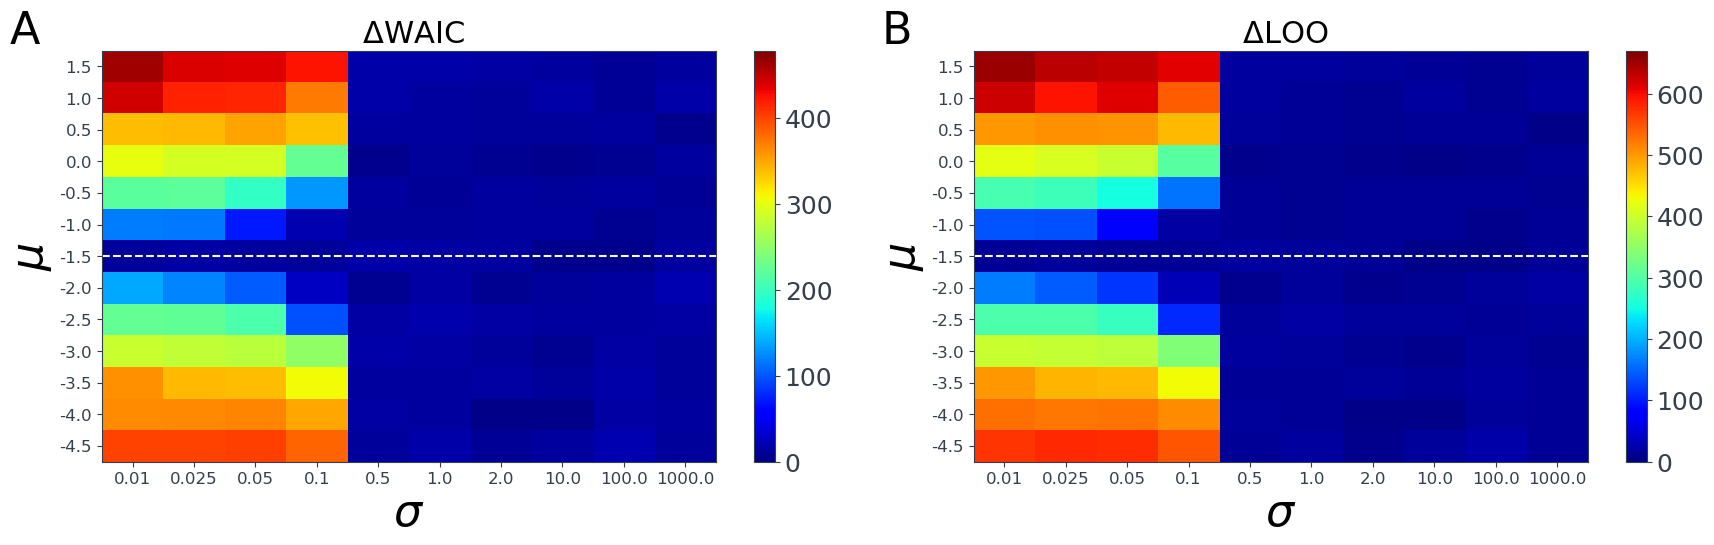

In [40]:
fig=figure(figsize=(18,6))


subplot(121)
imshow((-2*elpd_waic_values_mean).reshape(len(mu_values),len(sd_values))-(-2*elpd_waic_values_mean).reshape(len(mu_values),len(sd_values)).min(), aspect='auto',  origin='lower', cmap='jet')
plt.hlines(y=9., xmin=-.5, xmax=9.5, linewidth=1.5, color = 'w', linestyle='--' )
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
yticks(r_[:len(mu_values)], mu_values,  fontsize=12);
xticks(r_[:len(sd_values)], sd_values,  fontsize=12);
ylim((2.5,15.5))
xlabel("$\sigma$",  fontsize=32)
ylabel("$\mu$",  fontsize=32)
title(r' ${\rm \Delta WAIC}$',  fontsize=22)

subplot(122)
imshow((-2*loo_values_mean).reshape(len(mu_values),len(sd_values))-(-2*loo_values_mean).reshape(len(mu_values),len(sd_values)).min(), aspect='auto',  origin='lower', cmap='jet')
plt.hlines(y=9., xmin=-.5, xmax=9.5, linewidth=1.5, color = 'w', linestyle='--' )
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
yticks(r_[:len(mu_values)], mu_values,  fontsize=12);
xticks(r_[:len(sd_values)], sd_values,  fontsize=12, rotation="horizontal");
ylim((2.5,15.5))
xlabel("$\sigma$",  fontsize=32)
ylabel("$\mu$",  fontsize=32)
title(r' ${\rm \Delta LOO}$',  fontsize=22)

for i, label in enumerate(('A', 'B')):
    ax = fig.add_subplot(1,2,i+1)
    ax.text(-0.1, 1.1, label, transform=ax.transAxes,
    fontsize=32, fontweight='medium', va='top', ha='right')
    
#ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
fig.tight_layout(pad=2.5, w_pad=2, h_pad=3.)
plt.savefig("Fig_epileptor_sweep_scores.png",dpi=800)
plt.show()